# Assignment 3 Pattern Mining and Recommender Systems: Individual Code

### Import statements

In [70]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpmax, fpgrowth
import pandas as pd
import seaborn as sns

### Data Exploration


In [71]:
df = pd.read_csv('Groceries data train.csv')
df.head(10)

,User_id,Date,itemDescription,year,month,day,day_of_week
0,2351.0,1/01/2014,cleaner,2014.0,1.0,1.0,2.0
1,2226.0,1/01/2014,sausage,2014.0,1.0,1.0,2.0
2,1922.0,1/01/2014,tropical fruit,2014.0,1.0,1.0,2.0
3,2943.0,1/01/2014,whole milk,2014.0,1.0,1.0,2.0
4,1249.0,1/01/2014,citrus fruit,2014.0,1.0,1.0,2.0
5,3681.0,1/01/2014,onions,2014.0,1.0,1.0,2.0
6,1440.0,1/01/2014,other vegetables,2014.0,1.0,1.0,2.0
7,2974.0,1/01/2014,berries,2014.0,1.0,1.0,2.0
8,2727.0,1/01/2014,hamburger meat,2014.0,1.0,1.0,2.0
9,1789.0,1/01/2014,hamburger meat,2014.0,1.0,1.0,2.0


In [72]:
df.tail()

,User_id,Date,itemDescription,year,month,day,day_of_week
26980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26984,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User_id          19382 non-null  float64
 1   Date             19382 non-null  object 
 2   itemDescription  19382 non-null  object 
 3   year             19382 non-null  float64
 4   month            19382 non-null  float64
 5   day              19382 non-null  float64
 6   day_of_week      19382 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.4+ MB


In [74]:
df.describe()

,User_id,year,month,day,day_of_week
count,19382.000000,19382.000000,19382.000000,19382.000000,19382.000000
mean,3009.050769,2014.057012,6.166134,15.391342,3.023785
std,1158.135945,0.231871,3.572992,8.750628,1.994446
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,1998.000000,2014.000000,3.000000,8.000000,1.000000
50%,3015.500000,2014.000000,6.000000,15.000000,3.000000
75%,4025.000000,2014.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


<Axes: >

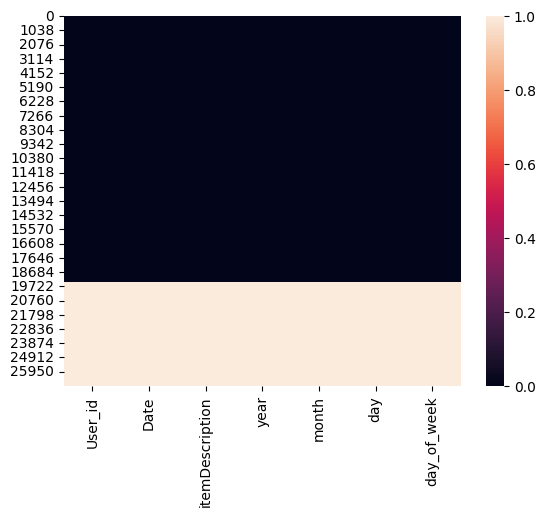

In [75]:
sns.heatmap(df.isnull())

In [76]:
df.dropna(inplace=True) # Removing null Values

After removing null values, It was found that there are 3493 users and 167 number of unique items in the transcations across 384 dates.

In [77]:
df.Date.nunique()

384

In [78]:
df.User_id.nunique()

3493

In [79]:
df.itemDescription.nunique()

167

### Exploratory Data Analysis

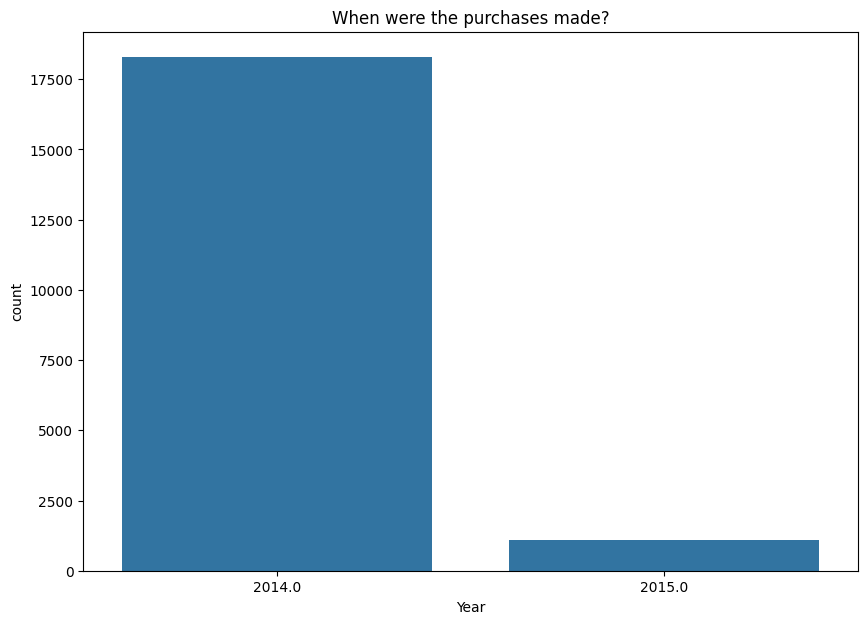

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.countplot(data=df, x=df['year'])
plt.title('When were the purchases made?')
plt.xlabel('Year')
plt.show()

In [81]:
x = df['itemDescription'].value_counts().sort_values(ascending=False)[:10]


Top 10 frequently sold products


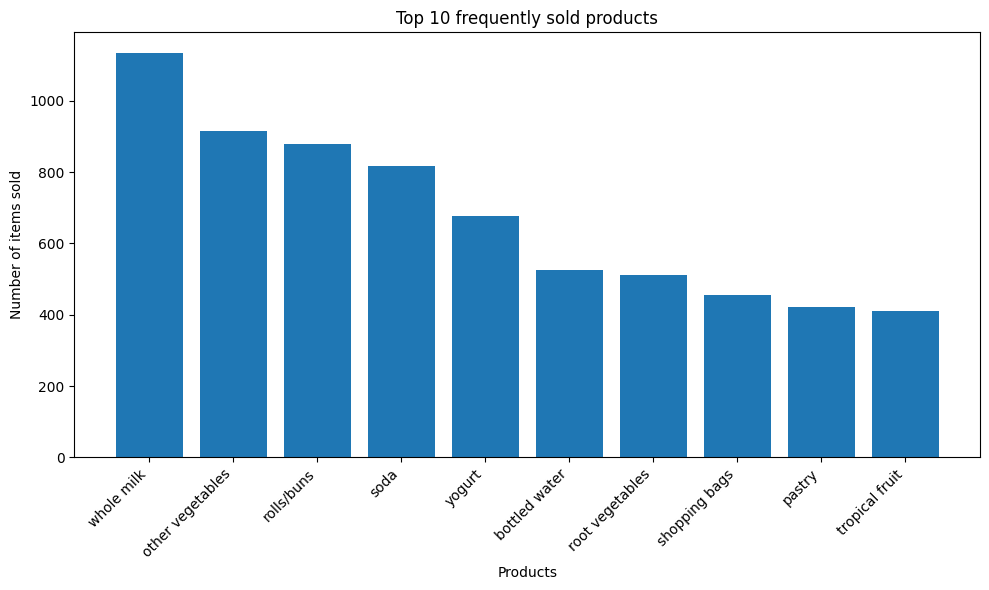

In [82]:
import matplotlib.pyplot as plt

print("Top 10 frequently sold products")

plt.figure(figsize=(10,6))
plt.bar(x.index, x.values)
plt.title("Top 10 frequently sold products")
plt.xlabel("Products")
plt.ylabel("Number of items sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [83]:
x = df['itemDescription'].value_counts().sort_values(ascending=True)[:10]


Top 10 least sold products


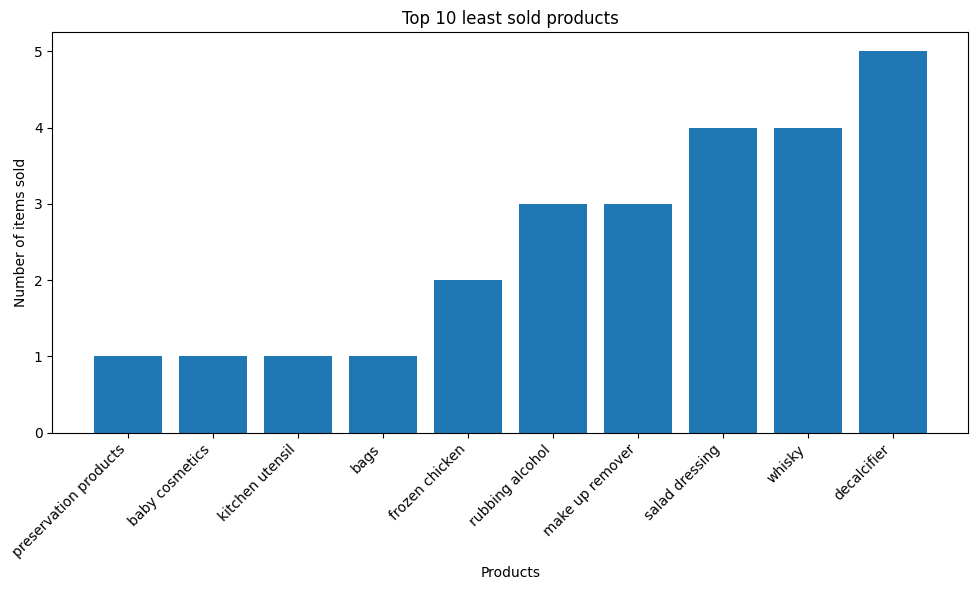

In [84]:
import matplotlib.pyplot as plt

print("Top 10 least sold products")

plt.figure(figsize=(10,6))
plt.bar(x.index, x.values)
plt.title("Top 10 least sold products")
plt.xlabel("Products")
plt.ylabel("Number of items sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [85]:
import matplotlib.pyplot as plt

# Prepare data
df['date_counts'] = df.groupby(df["year"],df["month"]).tolist()

# Plot
plt.figure(figsize=(12,6))
plt.bar(date_counts.index.astype(str), date_counts.values)
plt.title("Exploring highest sales by date")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


TypeError: unhashable type: 'Series'

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

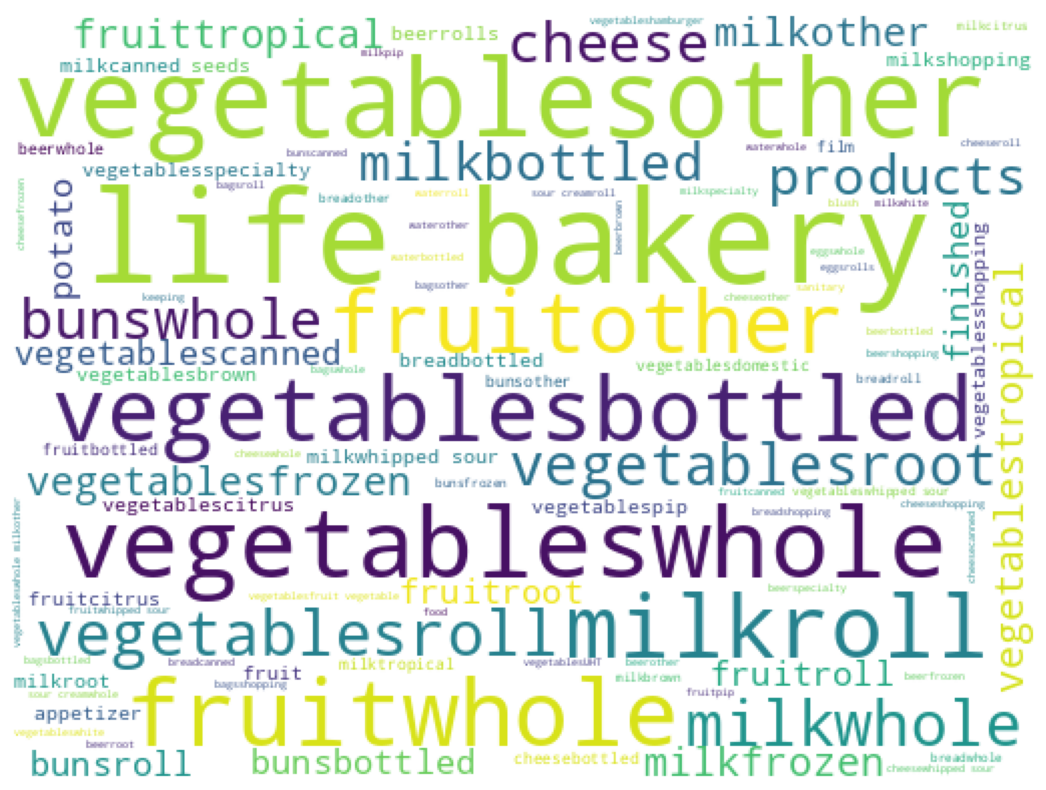

In [86]:
from wordcloud import WordCloud

plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384,
                     max_words=100).generate("".join(df['itemDescription']))

plt.imshow(wordcloud)
plt.axis('off')

In [87]:
products = df['itemDescription'].unique()
print(products[:])

['cleaner' 'sausage' 'tropical fruit' 'whole milk' 'citrus fruit' 'onions'
 'other vegetables' 'berries' 'hamburger meat' 'bottled water' 'butter'
 'yogurt' 'waffles' 'soda' 'sliced cheese' 'curd' 'specialty chocolate'
 'shopping bags' 'flower (seeds)' 'coffee' 'whipped/sour cream'
 'frozen potato products' 'candles' 'bottled beer' 'Instant food products'
 'frozen vegetables' 'brown bread' 'domestic eggs' 'dishes' 'chocolate'
 'pip fruit' 'frankfurter' 'sugar' 'beef' 'meat' 'root vegetables'
 'pastry' 'ice cream' 'rolls/buns' 'chicken' 'white bread' 'frozen fish'
 'sparkling wine' 'cream cheese ' 'fruit/vegetable juice' 'condensed milk'
 'soft cheese' 'canned beer' 'candy' 'dessert' 'butter milk'
 'pickled vegetables' 'frozen dessert' 'hard cheese' 'oil' 'frozen meals'
 'napkins' 'misc. beverages' 'specialty bar' 'spices' 'margarine'
 'processed cheese' 'salty snack' 'liqueur' 'newspapers' 'cat food'
 'mustard' 'preservation products' 'seasonal products' 'soups'
 'male cosmetics' 'cann

Finding out the average number of items per transaction.

In [88]:
avg_items_per_transaction = df.groupby(['User_id','Date'])['itemDescription'].size().mean()
print(f"The average number of items per transaction is {round(avg_items_per_transaction, 2)}")

The average number of items per transaction is 2.32


In [89]:
# grouped = df.groupby(['User_id','year','month'])['item_clean'].apply(list).reset_index()
# grouped = df.groupby('User_id')['item_clean'].apply(list).reset_index()
grouped = df.groupby(['User_id','Date'])['itemDescription'].apply(lambda x: list(x))


In [90]:
grouped.head()

User_id  Date      
1000.0   24/06/2014        [whole milk, pastry, salty snack]
1001.0   12/12/2014                       [whole milk, soda]
         2/07/2014         [sausage, whole milk, rolls/buns]
         20/01/2015                      [frankfurter, soda]
1002.0   2/09/2014     [frozen vegetables, other vegetables]
Name: itemDescription, dtype: object

In [91]:
grouped.info()

<class 'pandas.core.series.Series'>
MultiIndex: 8361 entries, (np.float64(1000.0), '24/06/2014') to (np.float64(5000.0), '3/09/2014')
Series name: itemDescription
Non-Null Count  Dtype 
--------------  ----- 
8361 non-null   object
dtypes: object(1)
memory usage: 128.4+ KB


After grouping, we have a record of 8321 transactions and the average number of transcations per basket is 2.32.

In [103]:
# Group the Data into Transactions by User_id and Date
# grouped = df.groupby(['User_id', 'Month-Year'])['itemDescription'].apply(list).reset_index()

# Extract the list of transactions
transactions = grouped.values.tolist()

print("Total number of transactions:", len(transactions))
print("Sample transactions")
for t in transactions[:10]:
    print(t)

Total number of transactions: 8361
Sample transactions
['whole milk', 'pastry', 'salty snack']
['whole milk', 'soda']
['sausage', 'whole milk', 'rolls/buns']
['frankfurter', 'soda']
['frozen vegetables', 'other vegetables']
['butter', 'whole milk']
['root vegetables', 'detergent']
['frozen meals', 'dental care']
['rolls/buns', 'rolls/buns']
['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns']


In [104]:
#One-Hot Encode the Transaction Data
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)


In [105]:
df_encoded.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Since, the average number of transcations is only 2.32, after trying various values the min support value has been lowered to capture more frequent parings. Lift has been used as a metric here as confidence metric did not produce the desired rules in this dataset.

## Testing different values of min support to try and find the optimum value in apriori algorithm.



Test 1: min support = 0.001

In [106]:
allRulesCount = []
rulesCount = []
min_threshold = [1.2,1.25,1.3,1.35,1.4]

frequent_itemsets_apriori = apriori(df_encoded, min_support=0.001, use_colnames=True)

for threshold in min_threshold:

    rules = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=threshold)
    rulesCount.append(len(rules))

allRulesCount.append(rulesCount)
rulesCount = []

Test 2: min support = 0.002

In [107]:
frequent_itemsets_apriori = apriori(df_encoded, min_support=0.002, use_colnames=True)

for threshold in min_threshold:

    rules = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=threshold)
    rulesCount.append(len(rules))

allRulesCount.append(rulesCount)
rulesCount = []

Test 3: min support = 0.003

In [111]:
frequent_itemsets_apriori = apriori(df_encoded, min_support=0.003, use_colnames=True)

for threshold in min_threshold:

    rules = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=threshold)
    rulesCount.append(len(rules))

allRulesCount.append(rulesCount)
rulesCount = []

In [112]:
allRulesCount

[[32, 26, 22, 16, 12], [4, 4, 2, 2, 2], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

### Here we can find different number of rules generated in different settings of min support and lift which are visualized below to get a better understanding.

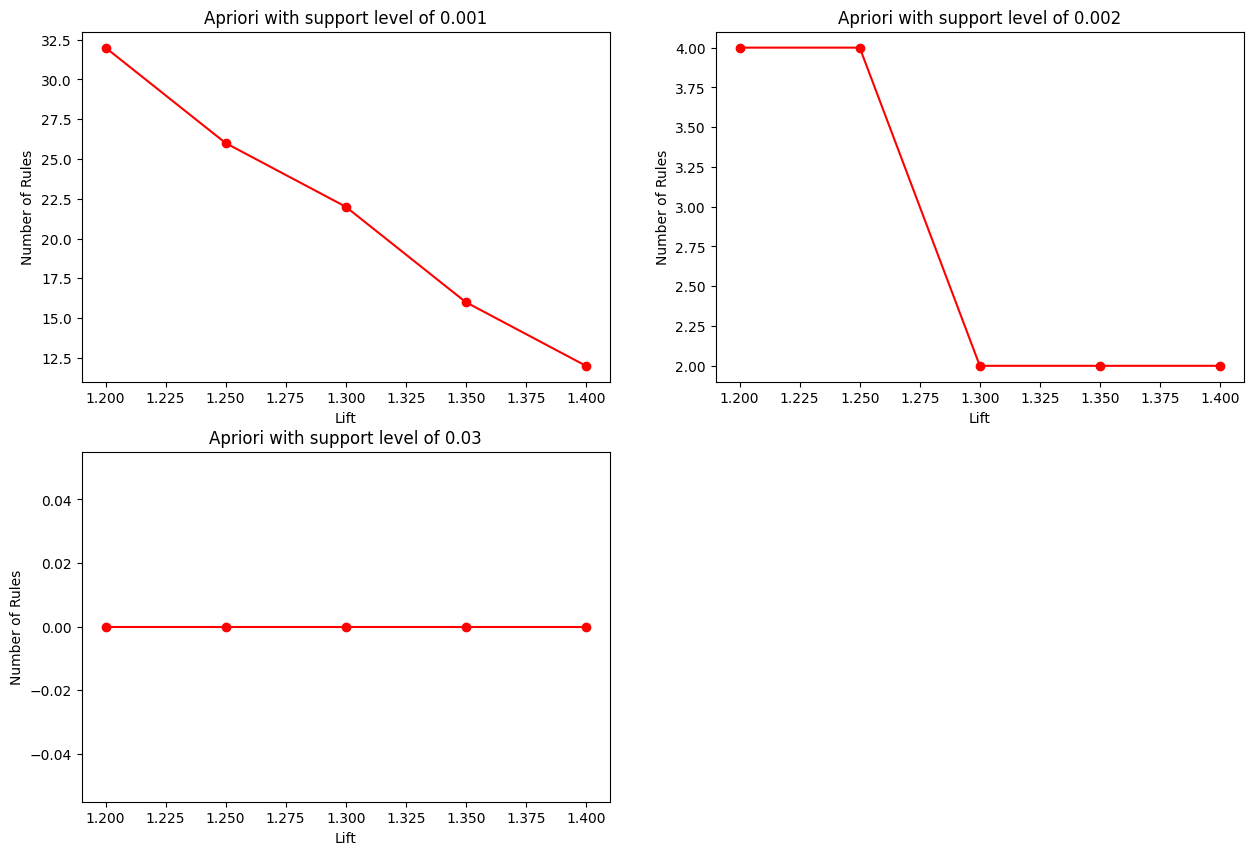

In [110]:
support = [0.001, 0.002, 0.03]

plt.figure(figsize=(15,10))
for index, _ in enumerate(allRulesCount):
    plt.subplot(2,2,index+1)
    plt.plot(min_threshold,allRulesCount[index], marker="o",linestyle="-", color="r")
    plt.xlabel("Lift")
    plt.ylabel("Number of Rules")
    plt.title('Apriori with support level of {}'.format(support[index]))

plt.show()

From the graph, we can see that the min support value of 0.001 generates maximun set of rules and gives a smooth graph and after filtering still gives a good number of rules as compared to the min support value of 0.002 which genertes only a handful of rules and 0.003 which generates no itensets at all. For further process the value of 0.001 is choden.

In [113]:
# Frequent Itemset Mining using Apriori

frequent_itemsets_apriori = apriori(df_encoded, min_support=0.001, use_colnames=True)

if frequent_itemsets_apriori.empty:
    print("No frequent itemsets found.")
else:
    print("Frequent Itemsets:")
    print(frequent_itemsets_apriori)

    #Generate Association Rules
    rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1.2)

    print("Frequent itemsets shape:", frequent_itemsets_apriori.shape)


    print("Association Rules:")
    print(rules_apriori)

# rules_apriori.to_csv("rules_dummy.csv")


Frequent Itemsets:
      support                          itemsets
0    0.004425           (Instant food products)
1    0.019854                        (UHT-milk)
2    0.001435                (abrasive cleaner)
3    0.001674                (artif. sweetener)
4    0.008013                   (baking powder)
..        ...                               ...
457  0.001076                 (yogurt, waffles)
458  0.003229  (whole milk, whipped/sour cream)
459  0.002512      (whipped/sour cream, yogurt)
460  0.002392         (white bread, whole milk)
461  0.006817              (whole milk, yogurt)

[462 rows x 2 columns]
Frequent itemsets shape: (462, 2)
Association Rules:
                antecedents              consequents  antecedent support  \
0                  (pastry)                (berries)            0.049635   
1                 (berries)                 (pastry)            0.016266   
2            (bottled beer)         (hamburger meat)            0.040545   
3          (hamburger me

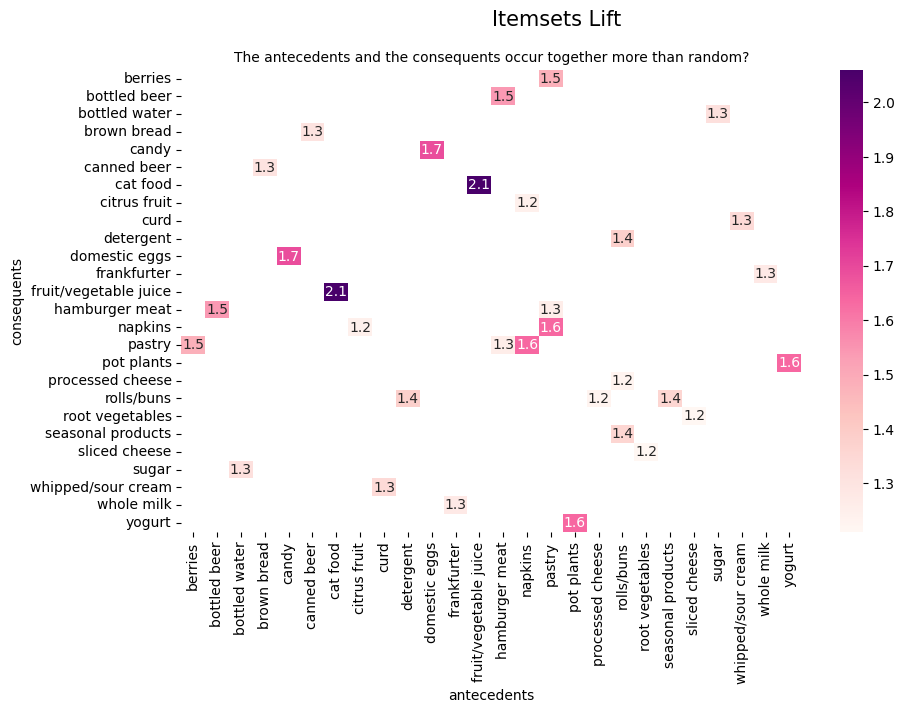

In [114]:
# convert antecedents and consequents into strings
rules_apriori['antecedents'] = rules_apriori['antecedents'].apply(lambda a: ','.join(list(a)))
rules_apriori['consequents'] = rules_apriori['consequents'].apply(lambda a: ','.join(list(a)))

# transform antecedent, consequent, and support columns into matrix
support_table_lift = rules_apriori.pivot(index='consequents', columns='antecedents', values='lift')

# generate a heatmap with annotations
plt.figure(figsize=(10,6))
sns.heatmap(support_table_lift, annot = True, cbar = True, cmap="RdPu")
plt.suptitle('Itemsets Lift', size = 15)
plt.title('The antecedents and the consequents occur together more than random?', size=10)
plt.show()

## Testing different values of min support to try and find the optimum value in fp_growth algorithm.


Test 1: min support = 0.001

In [116]:
allRulesCount_fp = []
rulesCount_fp = []
min_threshold = [1.2,1.25,1.3,1.35,1.4]

frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.001, use_colnames=True)

for threshold in min_threshold:

    rules = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=threshold)

    rulesCount_fp.append(len(rules))

allRulesCount_fp.append(rulesCount_fp)
rulesCount_fp = []

Test 2: min support = 0.002

In [117]:

frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.002, use_colnames=True)

for threshold in min_threshold:

    rules = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=threshold)

    rulesCount_fp.append(len(rules))

allRulesCount_fp.append(rulesCount_fp)
rulesCount_fp = []

Test 3: min support = 0.003

In [119]:

frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.003, use_colnames=True)

for threshold in min_threshold:

    rules = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=threshold)

    rulesCount_fp.append(len(rules))

allRulesCount_fp.append(rulesCount_fp)
rulesCount_fp = []

In [120]:
allRulesCount_fp

[[32, 26, 22, 16, 12], [4, 4, 2, 2, 2], [0, 0, 0, 0, 0]]

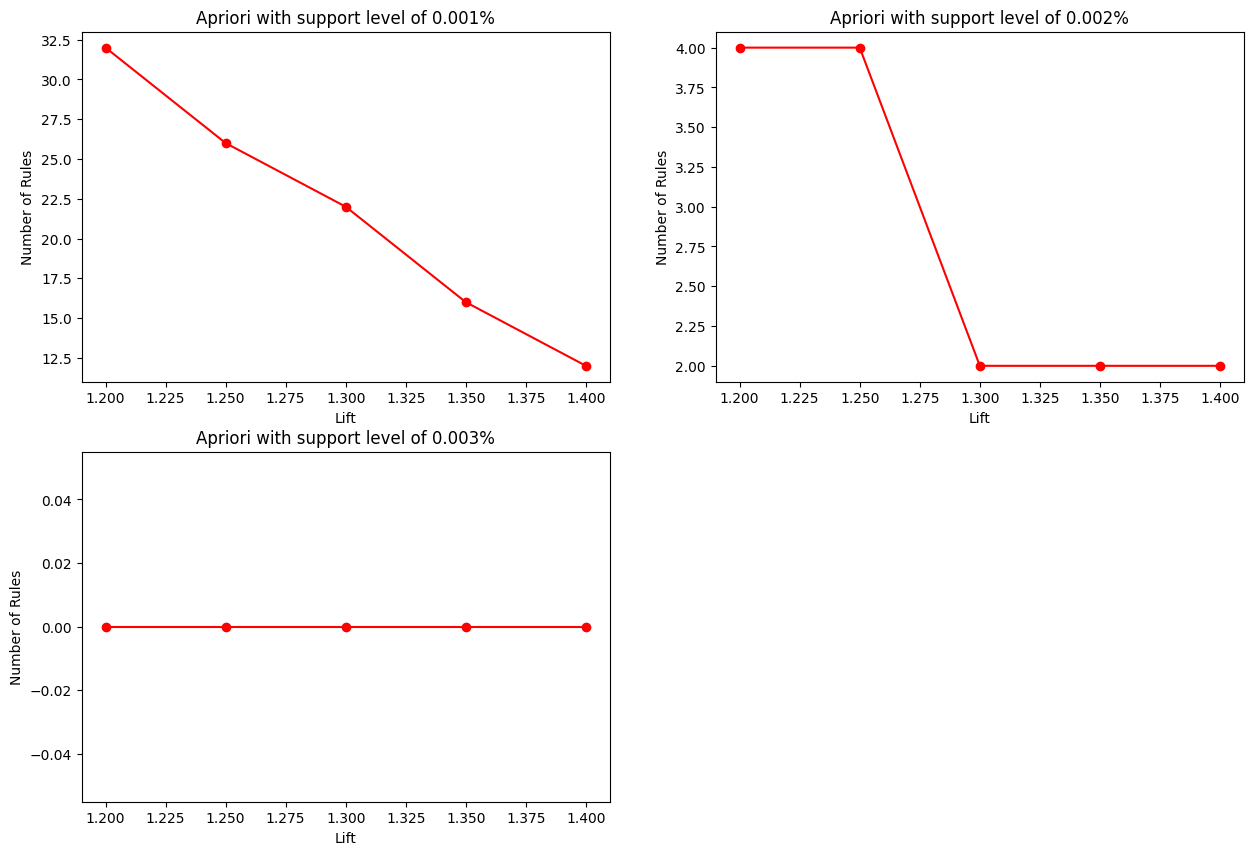

In [122]:
support = [0.001, 0.002, 0.003]

plt.figure(figsize=(15,10))
for index, _ in enumerate(allRulesCount_fp):
    plt.subplot(2,2,index+1)
    plt.plot(min_threshold,allRulesCount_fp[index], marker="o",linestyle="-", color="r")
    plt.xlabel("Lift")
    plt.ylabel("Number of Rules")
    plt.title('Apriori with support level of {}%'.format(support[index]))

plt.show()

The findings here are similar to the one in the previous graph where the apriori algorith had been used. Again the value of 0.001 is chosen as the optimum.

In [123]:
# Frequent Itemset Mining using FP-growth
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.001, use_colnames=True)
if frequent_itemsets_fp.empty:
    print("No frequent itemsets found.")
else:
    print("Frequent Itemsets (FP-growth):")
    print(frequent_itemsets_fp)

    rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1.2)
    print("Association Rules:")
    print(rules_fp)



Frequent Itemsets (FP-growth):
      support                         itemsets
0    0.130487                     (whole milk)
1    0.049635                         (pastry)
2    0.019615                    (salty snack)
3    0.094606                           (soda)
4    0.101902                     (rolls/buns)
..        ...                              ...
457  0.001316                      (soda, oil)
458  0.001435   (processed cheese, rolls/buns)
459  0.001076    (misc. beverages, whole milk)
460  0.001076    (misc. beverages, rolls/buns)
461  0.001076  (seasonal products, rolls/buns)

[462 rows x 2 columns]
Association Rules:
                antecedents              consequents  antecedent support  \
0             (frankfurter)             (whole milk)            0.012199   
1              (whole milk)            (frankfurter)            0.130487   
2               (detergent)             (rolls/buns)            0.008492   
3              (rolls/buns)              (detergent)      

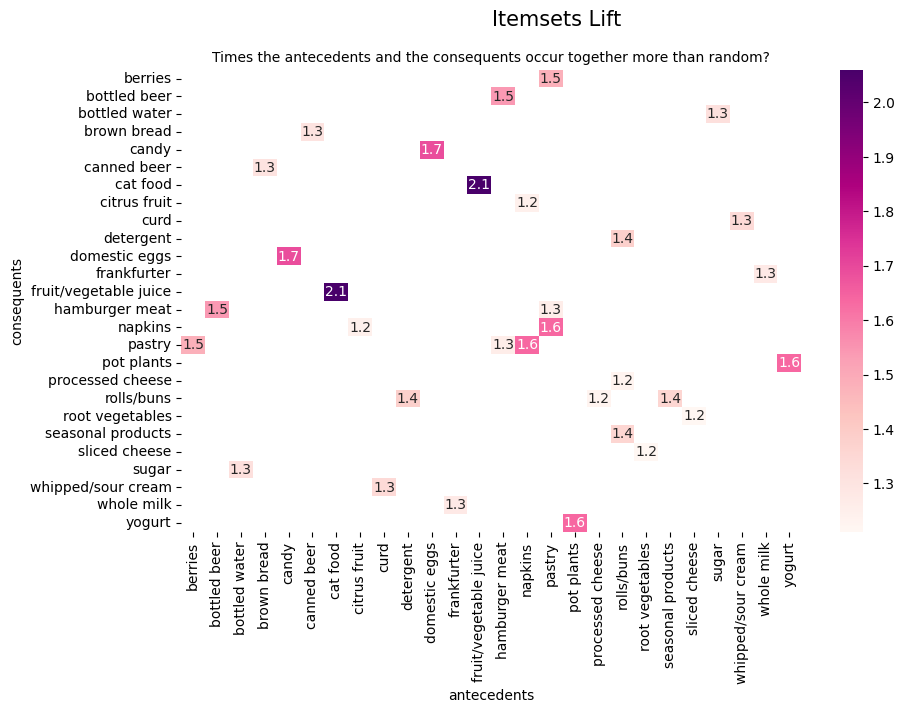

In [124]:
# convert antecedents and consequents into strings
rules_fp['antecedents'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))

# transform antecedent, consequent, and support columns into matrix
support_table_lift = rules_fp.pivot(index='consequents', columns='antecedents', values='lift')

# generate a heatmap with annotations
plt.figure(figsize=(10,6))
sns.heatmap(support_table_lift, annot = True, cbar = True, cmap="RdPu")
plt.suptitle('Itemsets Lift', size = 15)
plt.title('Times the antecedents and the consequents occur together more than random?', size=10)
plt.show()

Reflection after verson 1


*   List item
*   List item

